<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:150%; font-family:Lobster; background-color:#1A3636; overflow:hidden"><b> Clustering Connoisseurs: A Machine Learning Approach to Wine Classification 🍷 </b></div>

`Author:` [Phuong Phan](https://github.com/FahadUrRehman07)\
`Date:` 14.July.2024\
`Dataset:` [🍾 Wine Dataset for Clustering](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

### `INSPIRATION OF THE PROJECT`

> The complex and nuanced world of wine, with its diverse chemical constituents and subtle flavor profiles, has long been a subject of interest for oenophiles and researchers alike. However, understanding the underlying patterns and relationships between these constituents remains a significant challenge, hindering the development of accurate wine classification and recommendation systems. This project embarks on a journey to develop machine learning models capable of uncovering patterns in wine chemical constituents, clustering wines based on their similarities, and advancing the field of wine analytics, ultimately enhancing the wine experience for connoisseurs and enthusiasts worldwide.

![Wine Connoisseurs](https://image.pollinations.ai/prompt/photorealistic%20wine%20bottle%20red%20label%20cork%20wooden%20table%20dimly%20lit%20background?width=1024&height=1024&nologo=poll&nofeed=yes&seed=21984)

`Problem Statement`

> The wine industry is facing a significant challenge in understanding the complex relationships between wine chemical constituents, making it difficult to accurately classify and recommend wines.

> The lack of an efficient and accurate system for clustering wines based on their chemical constituents hinders the development of personalized wine recommendations, leading to poor customer satisfaction and revenue loss.

>  A machine learning-based approach to clustering wines can revolutionize the wine industry, enabling wine experts to create personalized recommendations that increase customer satisfaction and loyalty.

`About Dataset`
    This comprehensive dataset, comprising 13 chemical constituents of wine, captures the diverse chemical profiles of wines from the same region in Italy but derived from three different cultivars. The data was collected from a chemical analysis of wines, and the information about the types of wine was removed for unsupervised learning. To ensure data quality and diversity, the dataset was preprocessed using techniques such as feature scaling, normalization, and handling missing values. This robust dataset provides an ideal foundation for developing and validating high-performance machine learning models for clustering wines based on their chemical constituents.

### `Methodology`

> **EDA**: Summarize main characteristics of the dataset. Using various visualizations techniques and statistical methods to identify patterns, outliers, and correlations.
>
> **Data Preprocessing**: Applying StandardScaler to the training features. Then finally shuffling dataset to increase randomness and reduce the likelihood of bias in the training process. Outliers are also been considering.
>
> **Evaluation**: Using silhouette score from Scikit-learn to evaluate the performance of the trained model. Graphically visualizing model's performance by Scipy hierarchy dendrogram and KElbowVisualizer from Yellowbrick.
>
> **Hyperparameter Tuning**: Taking the optimized k of Hierarchical/ Agglomerativ, Elbow Method as inputs. A Kmean model is then defined to cluster the wine data into k groups based on their chemical constituents.
>
> **Prediction**: Predict the cluster assignment of new, unseen wine samples based on their chemical constituents.

<div style="font-family: 'Bodoni Moda SC', cursive;text-align: center; background-color: #1A3636; font-size: 150%; color: white; padding: 14px; border-radius: 14px">Installing Required Libraries</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')
## Data ##
import numpy as np
import pandas as pd
import os
import sys
import json
import pathlib
import shutil

## Visualization ##
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import display, Javascript, Image, YouTubeVideo

#print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

In [2]:
!pip install ydf -U -q
import ydf

!pip install scikit-optimize -q
from skopt import BayesSearchCV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler, RobustScaler
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage



from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,\
                            accuracy_score, precision_score, recall_score, f1_score, silhouette_score

from skopt.space import Integer, Real

!pip install -q yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [16]:
cwd = os.path.abspath('.')
df = pd.read_csv(cwd + '\wine-clustering.csv')

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#1A3636; overflow:hidden"><b> Data Content  </b></div>

In [18]:
display(df.head())
print(30*"-","SHAPE",30*"-")
df.shape

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


------------------------------ SHAPE ------------------------------


(178, 13)

In [20]:
round(df.describe().T,1)

,count,mean,std,min,25%,50%,75%,max
Alcohol,178.0,13.0,0.8,11.0,12.4,13.0,13.7,14.8
Malic_Acid,178.0,2.3,1.1,0.7,1.6,1.9,3.1,5.8
Ash,178.0,2.4,0.3,1.4,2.2,2.4,2.6,3.2
Ash_Alcanity,178.0,19.5,3.3,10.6,17.2,19.5,21.5,30.0
Magnesium,178.0,99.7,14.3,70.0,88.0,98.0,107.0,162.0
Total_Phenols,178.0,2.3,0.6,1.0,1.7,2.4,2.8,3.9
Flavanoids,178.0,2.0,1.0,0.3,1.2,2.1,2.9,5.1
Nonflavanoid_Phenols,178.0,0.4,0.1,0.1,0.3,0.3,0.4,0.7
Proanthocyanins,178.0,1.6,0.6,0.4,1.2,1.6,2.0,3.6
Color_Intensity,178.0,5.1,2.3,1.3,3.2,4.7,6.2,13.0


# `Missing value analysis`

In [22]:
print(df.isnull().sum())
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.info()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64
0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 n

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#1A3636; overflow:hidden"><b> Exploratory Data Analysis (EDA)  </b></div>

In [24]:
print(30*"-","COLUMNS",30*"-")
display(df.columns)
print(30*"-","SHAPE",30*"-")
df.shape

------------------------------ COLUMNS ------------------------------


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

------------------------------ SHAPE ------------------------------


(178, 13)

# ` Distribution of all Variables`

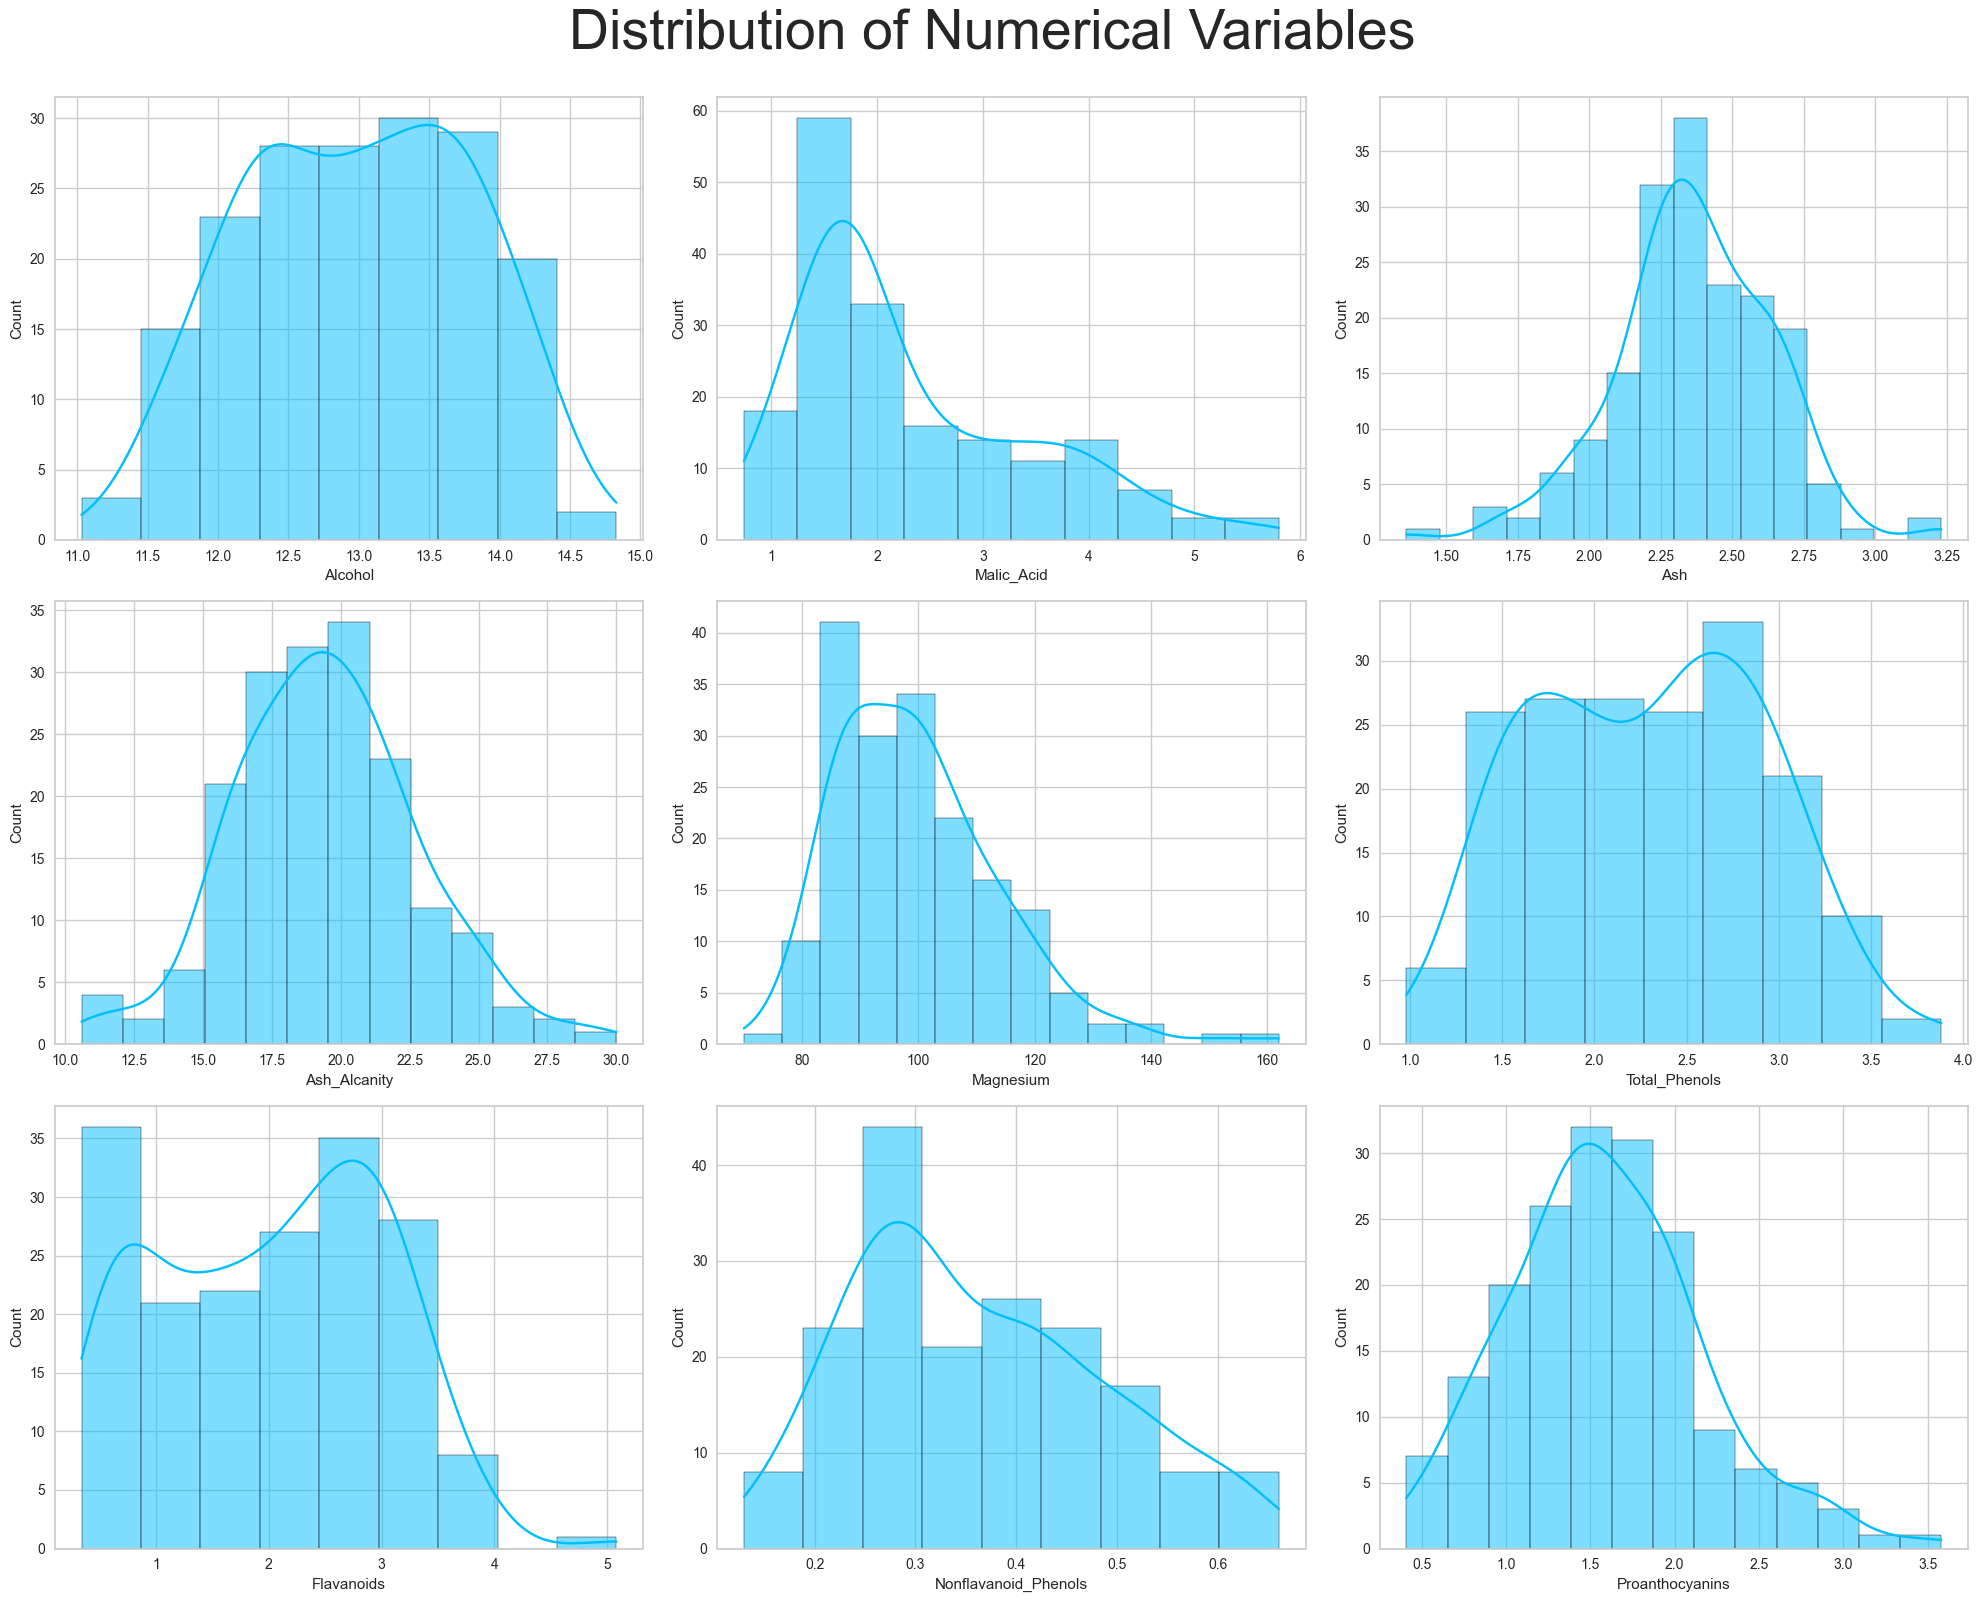

In [32]:
# Distribution of numerical columns
plt.figure(figsize=(20, 16))
plotnumber = 1

for col in df.columns:
    if plotnumber > 9:
        break
    plt.subplot(3, 3, plotnumber)
    sns.histplot(df[col], kde=True, color='deepskyblue')
    plt.xlabel(col)

    plotnumber += 1

plt.suptitle('Distribution of Numerical Variables', fontsize=40, y=1)
plt.tight_layout()
plt.show()

# `Correlation Matrix`

<Axes: title={'center': 'Feature Correlation'}>

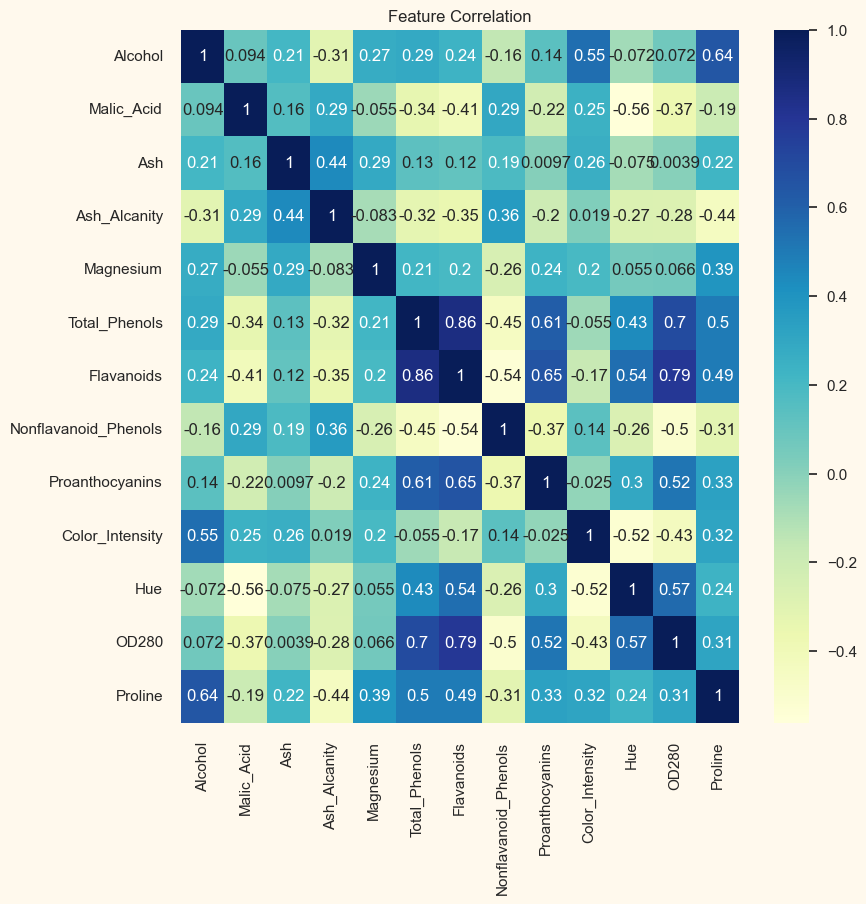

In [ ]:
plt.figure(figsize=(9, 9))
plt.title('Feature Correlation')
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#1A3636; overflow:hidden"><b> Data Preprocessing  </b></div>

In [44]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#1A3636; overflow:hidden"><b> Determining the optimal number of clusters </b></div>


# `With the Elbow Method`

In [65]:
ssd = [] # sum of squared error
K = range(1,10) # Number of clustering

for k in K:
    kmeans = KMeans(n_clusters=k).fit(df)
    ssd.append(kmeans.inertia_)
ssd

[2314.0000000000005,
 1659.0079672511501,
 1277.928488844642,
 1184.017640862071,
 1111.5110327667344,
 1051.8401566131765,
 986.0509123632777,
 942.4274401330708,
 913.644897204282]

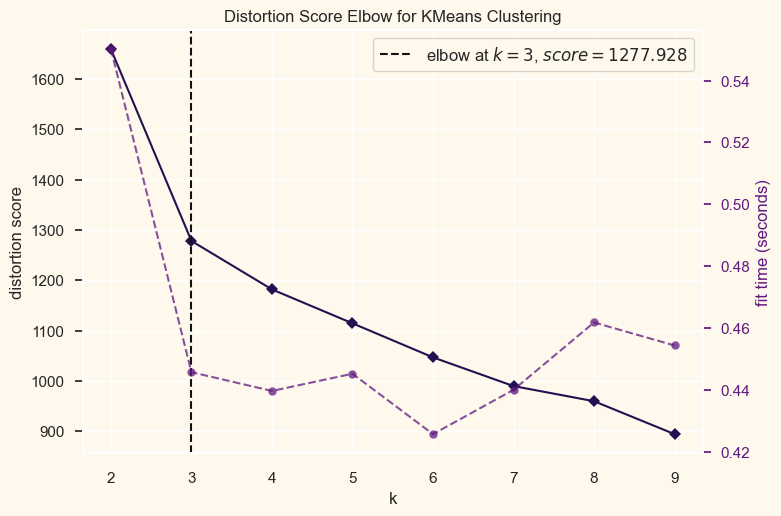

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [77]:
kmeans = KMeans()
sns.set_palette(sns.color_palette("magma"))
elbow = KElbowVisualizer(kmeans, k = (2, 10))
elbow.fit(df)
elbow.show()

In [67]:
elbow.elbow_value_

3

# `With Hierarchical/ Agglomerativ`

In [ ]:
X = np.array(df)
y_pred = kmeans.fit_predict(df)

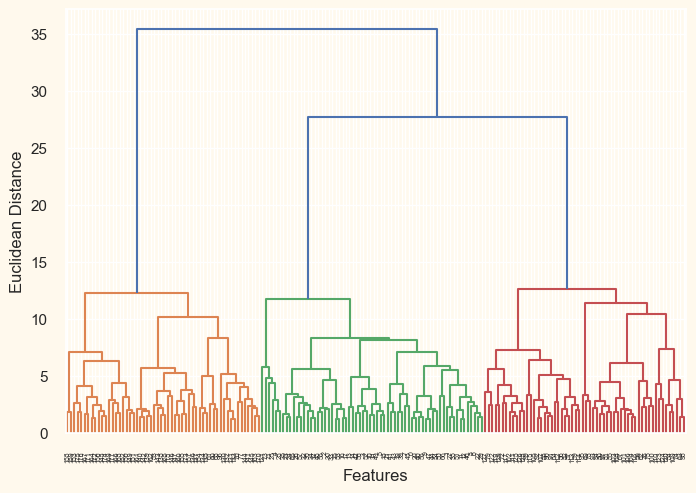

In [79]:
import scipy.cluster.hierarchy as sch

sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
#cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.xlabel('Features')
plt.ylabel('Euclidean Distance')
plt.show()

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#1A3636; overflow:hidden"><b> Modelling  </b></div>

In [89]:
kmeans= KMeans(n_clusters=elbow.elbow_value_, random_state=11).fit(df)

# Number of clustering
kmeans.n_clusters

# Centers of cluster
kmeans.cluster_centers_

# Looking at which cluster the observations are in
kmeans.labels_

# Looking at the error sums of the clusters
kmeans.inertia_

kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 'warn',
 'random_state': 11,
 'tol': 0.0001,
 'verbose': 0}

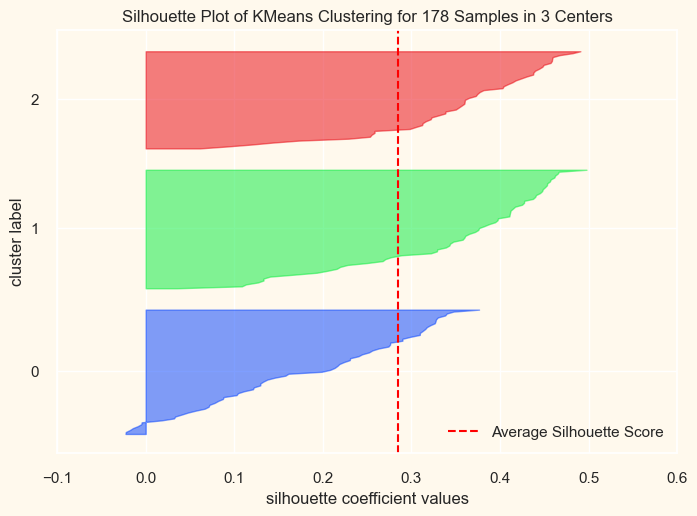

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 178 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [91]:
from yellowbrick.cluster import SilhouetteVisualizer
visualizer = SilhouetteVisualizer(kmeans, colors="sns_bright")
visualizer.fit(df)
visualizer.show()

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#1A3636; overflow:hidden"><b> Evaluation  </b></div>

In [95]:
X = np.array(df)
y_pred = kmeans.fit_predict(df)

In [97]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

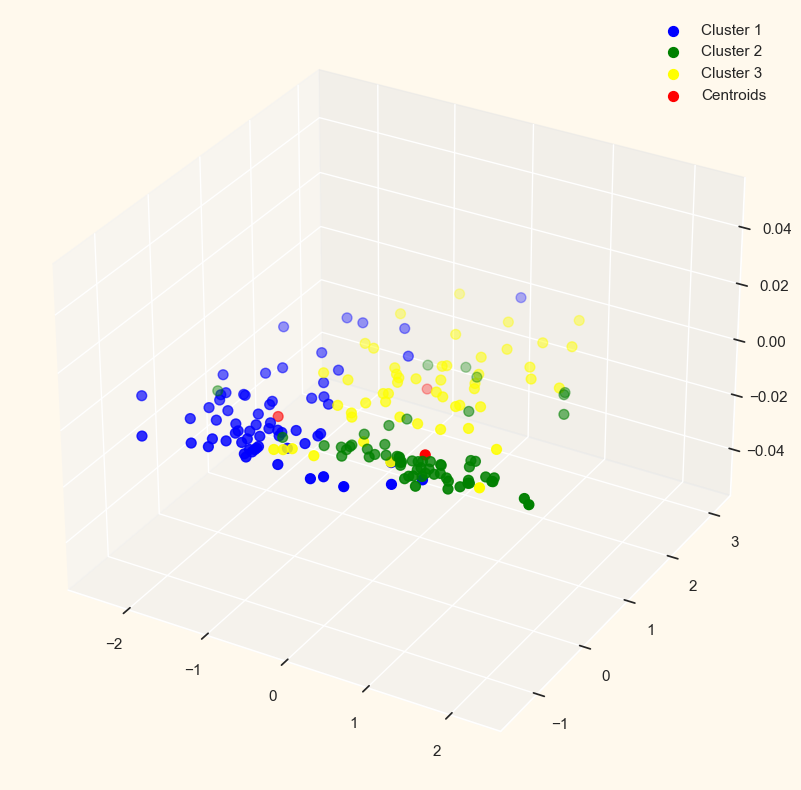

In [99]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_pred==0, 0], X[y_pred==0, 1],c='blue',s=50,label='Cluster 1')
plt.scatter(X[y_pred==1, 0], X[y_pred==1, 1],c='green',s=50,label='Cluster 2')
plt.scatter(X[y_pred==2, 0], X[y_pred==2, 1],c='yellow',s=50,label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',s=50, label='Centroids' )
plt.legend()
plt.show()

In [101]:
silhouette_score(X, y_pred)

0.2848589191898987

<a id='corr'></a>
## <div style="text-align:center; border-radius:15px 50px; padding:7px; color:white; margin:0; font-size:100%; font-family:Bodoni Moda SC; background-color:#1A3636; overflow:hidden"><b> Adding Clustering Results to the Master Data Set  </b></div>


In [103]:
# Adding clusters to df
clusters_kmeans = kmeans.labels_
df = pd.read_csv(cwd + '\wine-clustering.csv')

df["clusters"] = clusters_kmeans
df["clusters"] = df["clusters"] + 1
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [105]:
clusters = pd.DataFrame(df.groupby("clusters").agg("mean"))
clusters

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
clusters,,,,,,,,,,,,,
1,12.250923,1.897385,2.231231,20.063077,92.738462,2.247692,2.050000,0.357692,1.624154,2.973077,1.062708,2.803385,510.169231
2,13.676774,1.997903,2.466290,17.462903,107.967742,2.847581,3.003226,0.292097,1.922097,5.453548,1.065484,3.163387,1100.225806
3,13.134118,3.307255,2.417647,21.241176,98.666667,1.683922,0.818824,0.451961,1.145882,7.234706,0.691961,1.696667,619.058824


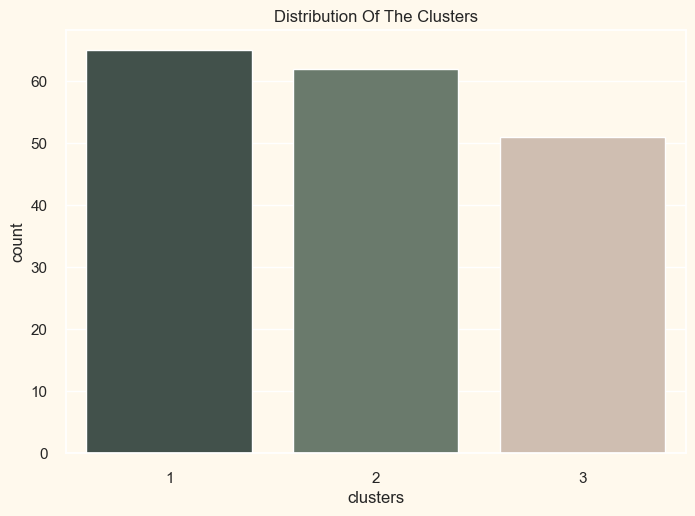

In [149]:
#Plotting countplot of clusters
palette = sns.color_palette('pastel')
pal = ["#40534C","#677D6A", "#D4BDAC","#F3AB60"]
pl = sns.countplot(x=df["clusters"], palette = pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

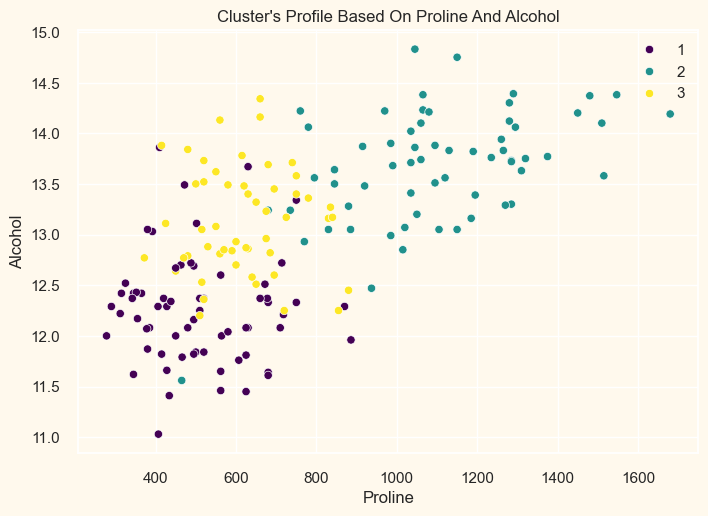

In [161]:
pl = sns.scatterplot(data = df,x=df["Proline"], y=df["Alcohol"],hue=df["clusters"], palette= 'viridis')
pl.set_title("Cluster's Profile Based On Proline And Alcohol")
plt.legend()
plt.show()

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
            <li>cluster 1: low Proline & low Alcohol
            <li>  cluster 2: low Proline & average Alcohol
            <li>cluster 3: average Proline & high Alcohol </li>
    </ul>
</div>

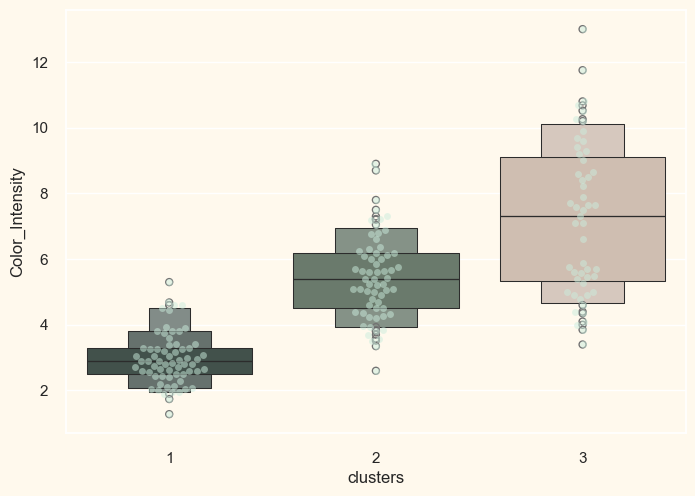

In [164]:
plt.figure()
pl=sns.swarmplot(x=df["clusters"], y=df["Color_Intensity"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["clusters"], y=df["Color_Intensity"], palette=pal)
plt.show()

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #c77220;">
    <ul style="font-size: 22px; font-family: 'Arial'; line-height: 1.5em; ">
            <li> cluster 1 has less color_intensity, folowed by cluster 2 - which is opposite to cluster 3
    </ul>
</div>

<div style="display: flex; justify-content: center;">
    <img src="https://i.giphy.com/gEP2k49ndOqJDBSPZl.webp" alt="GIF">
</div>

***I hope you found it informative and engaging. If you enjoyed the content and found it helpful. Your feedback is valuable and encourages me to create more content like this in the future.***